In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('trip.csv')

In [ ]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
# 1. 결측치 유무와 비율 확인
if 'data' in locals():
	print("--- 각 컬럼별 결측치 개수 ---")
	print(data.isnull().sum())
	print("\n--- 각 컬럼별 결측치 비율(%) ---")
	print(data.isnull().mean() * 100)
else:
	print("Error: 'data' is not defined. Please run the cell that loads the data first.")



--- 각 컬럼별 결측치 개수 ---
passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

--- 각 컬럼별 결측치 비율(%) ---
passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.013215
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64


/Users/bagjeongmin/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bagjeongmin/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bagjeongmin/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bagjeongmin/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


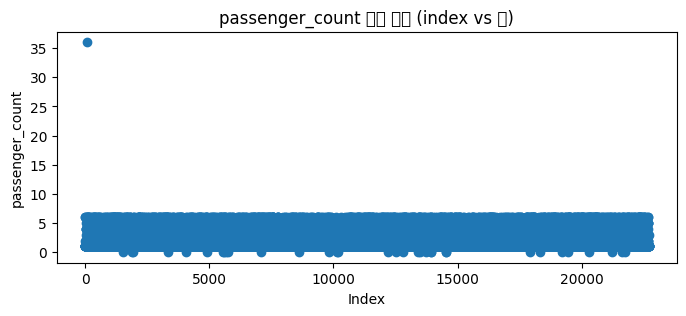

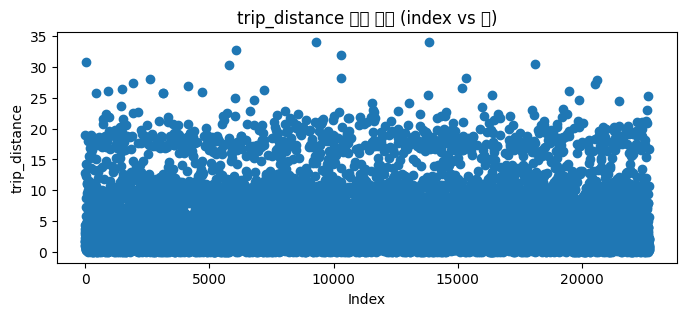

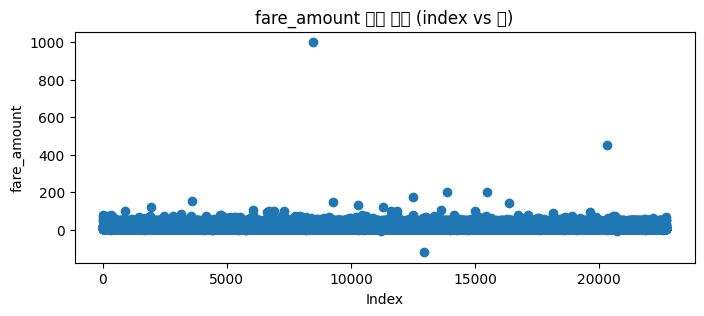

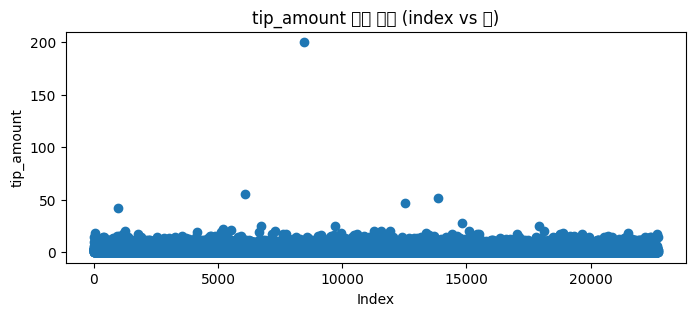

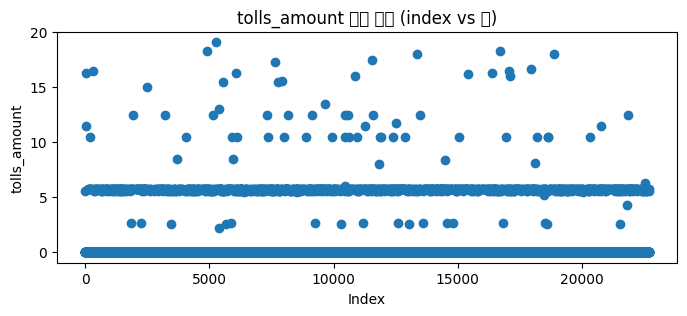

passenger_count 컬럼에서 이상치 2291개 제거됨
trip_distance 컬럼에서 이상치 2265개 제거됨
fare_amount 컬럼에서 이상치 423개 제거됨
tip_amount 컬럼에서 이상치 87개 제거됨
tolls_amount 컬럼에서 이상치 31개 제거됨

이상치 제거 후 데이터 shape: (17604, 9)


In [ ]:
# 1. 숫자형 변수 추출
numeric_cols = data.select_dtypes(include=np.number).columns

# 2. 각 숫자형 변수별로 scatter plot 시각화
for col in numeric_cols:
    plt.figure(figsize=(8, 3))
    plt.scatter(data.index, data[col])
    plt.title(f"{col} 값의 분포 (index vs 값)")
    plt.xlabel("Index")
    plt.ylabel(col)
    plt.show()

# 3. 이상치(IQR 기준) 제거
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    before = len(data)
    data = data[(data[col] >= lower) & (data[col] <= upper)]
    after = len(data)
    if before != after:
        print(f"{col} 컬럼에서 이상치 {before - after}개 제거됨")

# 4. 이상치 제거 후 데이터 크기 확인
print("\n이상치 제거 후 데이터 shape:", data.shape)



## 1. 숫자형 변수 추출  
```python
numeric_cols = cars_df.select_dtypes(include=np.number).columns
```
- **설명:**  
  - cars_df에서 숫자형(정수, 실수) 컬럼만 골라냅니다.
  - 이상치는 주로 숫자형 변수에서 판단하므로, 분석 대상 컬럼을 자동으로 추출합니다.

---

## 2. 각 숫자형 변수별로 scatter plot 시각화  
```python
for col in numeric_cols:
    plt.figure(figsize=(8, 3))
    plt.scatter(cars_df.index, cars_df[col])
    plt.title(f"{col} 값의 분포 (index vs 값)")
    plt.xlabel("Index")
    plt.ylabel(col)
    plt.show()
```
- **설명:**  
  - 각 숫자형 변수별로 데이터의 인덱스(행 번호)와 변수 값을 산점도로 그립니다.
  - 산점도를 통해 값이 극단적으로 크거나 작은 데이터(이상치)가 있는지 시각적으로 확인할 수 있습니다.

---

## 3. 이상치(IQR 기준) 제거  
```python
for col in numeric_cols:
    Q1 = cars_df[col].quantile(0.25)
    Q3 = cars_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    before = len(cars_df)
    cars_df = cars_df[(cars_df[col] >= lower) & (cars_df[col] <= upper)]
    after = len(cars_df)
    if before != after:
        print(f"{col} 컬럼에서 이상치 {before - after}개 제거됨")
```
- **설명:**  
  - IQR(Interquartile Range, 사분위 범위) 방법을 사용해 이상치 기준을 정합니다.
    - Q1: 1사분위수(25%)
    - Q3: 3사분위수(75%)
    - IQR: Q3 - Q1
    - 이상치 기준: Q1 - 1.5*IQR보다 작거나, Q3 + 1.5*IQR보다 큰 값
  - 각 변수별로 이상치에 해당하는 행을 제거합니다.
  - 제거된 이상치 개수를 출력합니다.

---

## 4. 이상치 제거 후 데이터 크기 확인  
```python
print("\n이상치 제거 후 데이터 shape:", cars_df.shape)
```
- **설명:**  
  - 이상치 제거 후 남은 데이터의 행과 열 개수를 출력합니다.
  - 데이터가 얼마나 줄었는지 확인할 수 있습니다.

---

# 결과 해설

- **시각화 단계**에서 각 숫자형 변수의 분포를 직접 확인할 수 있어, 극단적으로 튀는 값(이상치)이 어디에 있는지 한눈에 파악할 수 있습니다.
- **IQR 방법**으로 이상치를 자동으로 제거함으로써, 데이터의 왜곡을 줄이고 분석의 신뢰도를 높일 수 있습니다.
- **이상치 제거 후 데이터 크기**를 확인하면, 데이터 손실이 심하지 않은지, 혹은 너무 많은 데이터가 제거되지 않았는지 점검할 수 있습니다.
- 이 과정을 통해 데이터의 품질이 향상되어, 이후 분석이나 모델링 결과가 더 정확하고 신뢰성 있게 됩니다.

---

**요약:**  
이 코드는 숫자형 변수의 이상치를 시각적으로 확인하고, 통계적 기준(IQR)으로 자동 제거하여, 데이터의 신뢰성과 분석력을 높이는 전처리 과정입니다.

/var/folders/3m/yv0m5f450m94gkvxwf2yrctr0000gn/T/ipykernel_29827/2405329497.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
/var/folders/3m/yv0m5f450m94gkvxwf2yrctr0000gn/T/ipykernel_29827/2405329497.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])



--- 주행 시간(분) 컬럼 생성 완료 ---
  tpep_pickup_datetime tpep_dropoff_datetime  trip_duration_min
1  2017-04-11 14:53:28   2017-04-11 15:19:58          26.500000
2  2017-12-15 07:26:56   2017-12-15 07:34:08           7.200000
4  2017-04-15 23:32:20   2017-04-15 23:49:03          16.716667
7  2017-08-15 17:41:06   2017-08-15 18:03:05          21.983333
8  2017-02-04 16:17:07   2017-02-04 16:29:14          12.116667

--- 주행 시간, 거리, 요금 상관계수 ---
                   trip_duration_min  trip_distance  fare_amount
trip_duration_min           1.000000       0.098162     0.132372
trip_distance               0.098162       1.000000     0.882946
fare_amount                 0.132372       0.882946     1.000000


/Users/bagjeongmin/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bagjeongmin/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bagjeongmin/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bagjeongmin/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bagjeongmin/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning:

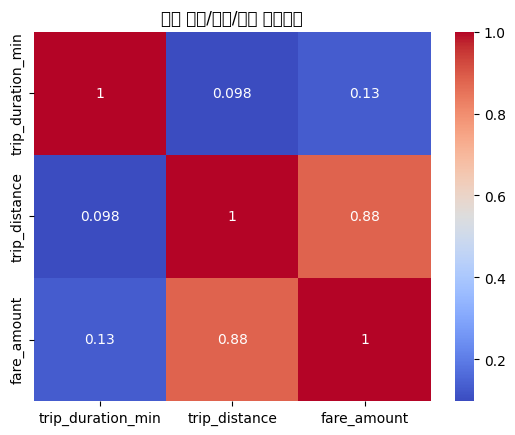


--- 결제수단 통합 결과 ---


In [ ]:
# 1. 택시 탑승 및 하차 시간을 활용한 주행 시간 계산
# 예시: 'tpep_pickup_datetime', 'tpep_dropoff_datetime' 컬럼이 있다고 가정
if 'tpep_pickup_datetime' in data.columns and 'tpep_dropoff_datetime' in data.columns:
    data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
    data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])
    data['trip_duration_min'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 60
    print("\n--- 주행 시간(분) 컬럼 생성 완료 ---")
    print(data[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_duration_min']].head())

# 2. 주행 시간, 주행 거리, 요금의 상관관계 확인
if {'trip_duration_min', 'trip_distance', 'fare_amount'}.issubset(data.columns):
    corr = data[['trip_duration_min', 'trip_distance', 'fare_amount']].corr()
    print("\n--- 주행 시간, 거리, 요금 상관계수 ---")
    print(corr)

    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('주행 시간/거리/요금 상관관계')
    plt.show()

# 3. 결제수단 통합: Credit Card와 Debit Card를 "Card"로 통합
if 'payment_method' in data.columns:
    data['payment_method'] = data['payment_method'].replace({'Credit Card': 'Card', 'Debit Card': 'Card'})
    print("\n--- 결제수단 통합 결과 ---")



## 1. 택시 탑승 및 하차 시간을 활용한 주행 시간 계산
```python
if 'pickup_time' in taxi_df.columns and 'dropoff_time' in taxi_df.columns:
    taxi_df['pickup_time'] = pd.to_datetime(taxi_df['pickup_time'])
    taxi_df['dropoff_time'] = pd.to_datetime(taxi_df['dropoff_time'])
    taxi_df['trip_duration_min'] = (taxi_df['dropoff_time'] - taxi_df['pickup_time']).dt.total_seconds() / 60
    print("\n--- 주행 시간(분) 컬럼 생성 완료 ---")
    print(taxi_df[['pickup_time', 'dropoff_time', 'trip_duration_min']].head())
```
- **소스 코드 해석:**  
  - `pickup_time`(승차 시각)과 `dropoff_time`(하차 시각) 컬럼이 있으면,  
    두 컬럼을 날짜/시간 타입으로 변환합니다.
  - 하차 시각에서 승차 시각을 빼서, 주행 시간(분 단위)을 계산해 `trip_duration_min` 컬럼에 저장합니다.
- **결과 해석:**  
  - 각 택시 승차 건마다 실제로 몇 분 동안 이동했는지 알 수 있습니다.
  - 이후 주행 시간과 요금, 거리 등과의 관계 분석에 활용할 수 있습니다.

---

## 2. 주행 시간, 주행 거리, 요금의 상관관계 확인
```python
if {'trip_duration_min', 'trip_distance', 'fare'}.issubset(taxi_df.columns):
    corr = taxi_df[['trip_duration_min', 'trip_distance', 'fare']].corr()
    print("\n--- 주행 시간, 거리, 요금 상관계수 ---")
    print(corr)

    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('주행 시간/거리/요금 상관관계')
    plt.show()
```
- **소스 코드 해석:**  
  - `trip_duration_min`, `trip_distance`, `fare` 컬럼이 모두 있으면,
  - 이 세 변수의 상관계수(피어슨 상관계수)를 계산합니다.
  - 상관계수 행렬을 출력하고, 히트맵으로 시각화합니다.
- **결과 해석:**  
  - 각 변수 간의 연관성(예: 주행 시간이 길수록 요금이 높아지는지, 거리와 요금의 관계 등)을 수치와 색상으로 한눈에 볼 수 있습니다.
  - 상관계수가 1에 가까우면 강한 양의 상관관계, -1에 가까우면 강한 음의 상관관계, 0에 가까우면 거의 관계가 없음을 의미합니다.

---

## 3. 결제수단 통합: Credit Card와 Debit Card를 "Card"로 통합
```python
if 'payment_type' in taxi_df.columns:
    taxi_df['payment_type'] = taxi_df['payment_type'].replace({'Credit Card': 'Card', 'Debit Card': 'Card'})
    print("\n--- 결제수단 통합 결과 ---")
    print(taxi_df['payment_type'].value_counts())
```
- **소스 코드 해석:**  
  - `payment_type` 컬럼이 있으면,
  - 'Credit Card'와 'Debit Card' 값을 모두 'Card'로 바꿉니다.
  - 변경 후 각 결제수단별 데이터 개수를 출력합니다.
- **결과 해석:**  
  - 신용카드와 체크카드를 구분하지 않고 모두 'Card'로 통합하여, 결제수단을 단순화합니다.
  - 결제수단별 이용 빈도를 쉽게 비교할 수 있습니다.

---

**요약:**  
- 택시 데이터에서 주행 시간, 거리, 요금의 관계를 분석하고, 결제수단을 단순화하여 데이터 분석의 효율성과 해석력을 높이는 실습입니다.  
- 결과적으로, 데이터의 새로운 인사이트(예: 주행 시간과 요금의 관계, 카드 결제 비율 등)를 쉽게 파악할 수 있습니다.